### ДЗ к уроку 3 "Работа с признаками и селекция" (ARIMA)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm

import itertools

import warnings


C:\Users\Larin-GV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет(ресемплинг) в представление по 1 месяцу.

In [4]:
Path_Energy = 'my_PJME_MW.csv'
df = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

df.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [5]:
df_m = df.resample('M').mean()

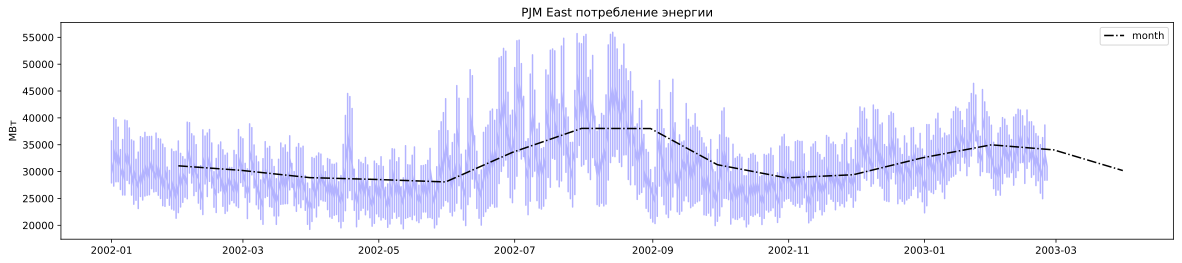

In [6]:
plt.figure(figsize =(20,4))
plt.plot(df.index[:5*24*7*4*3], df['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot(df_m.index[:5*3], df_m['PJME_MW'].values[:5*3], '-.k',label='month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

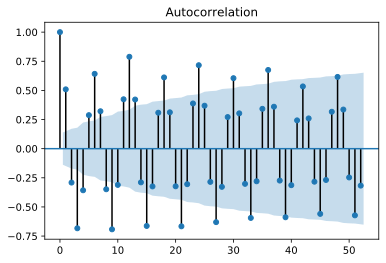

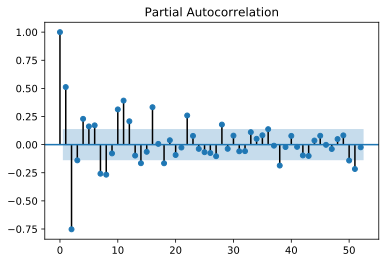

In [7]:
sm.graphics.tsa.plot_acf(df_m.PJME_MW.values, lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(df_m.PJME_MW.values, lags=52)
plt.show()

In [8]:
import warnings

# Определим p, d и q 
q = 2
p = 1
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
qs = 1
ps = 0
ds = 1
seasonal_pdq = [ps, ds, qs, 12] 

In [9]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [1, 2, 2]    : ps,ds,qs, S= [0, 1, 1, 12]


In [10]:
warnings.filterwarnings("ignore") # отключает предупреждения

model = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = model.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[1, 2, 2]x[0, 1, 1, 12] - AIC:2860.0715553231303


In [11]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(1, 2, 2)x(0, 1, 1, 12)   Log Likelihood               -1425.036
Date:                            Thu, 21 May 2020   AIC                           2860.072
Time:                                    15:54:18   BIC                           2875.416
Sample:                                         0   HQIC                          2866.303
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

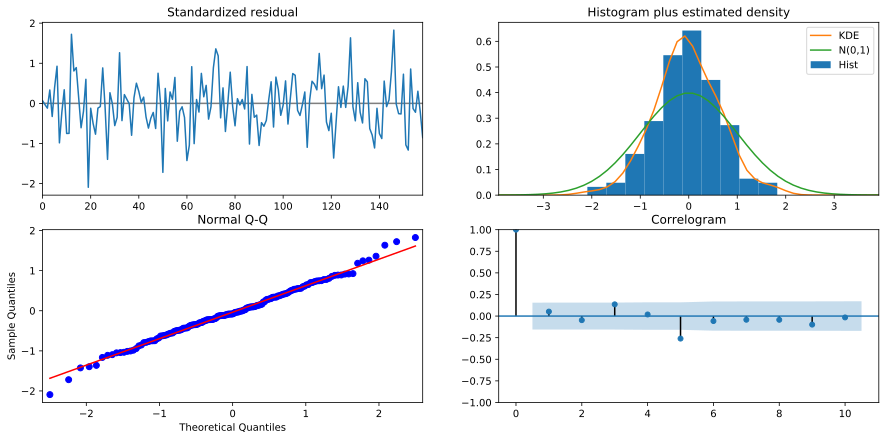

In [12]:
results.plot_diagnostics(figsize=(15, 7))
plt.show()

### 2. Подберите параметры модели SARIMAX для этого ряда.

In [13]:
p = d = q = range(0, 3)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
warnings.filterwarnings("ignore") # отключает предупреждения

best_params = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-30],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            best_params[results.aic] = (param, param_seasonal)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3992.5110075928433
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3604.1367746932465
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:3307.3157105213522
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2823.40519565099
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2598.6895974048684
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2365.324573179537
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:2759.2770606314034
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:2479.0128573862758
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2246.6239278705907
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2846.1162304291183
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2826.0055059051656
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:2574.8196730610803
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2605.4767835685666
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2588.3075909563477
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2361.655072095325
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:2496.362682200949
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:2466.6212365923293
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:2228.56793110993

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:2509.7905611689907
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:2292.9675568664793
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:2486.9450390580887
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:2350.372149093485
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:2118.766741521637
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:2577.4092631587796
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:2559.6011053142797
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:2507.512572877492
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:2355.5927290521536
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:2363.811813226047
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:2298.7383106814614
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:2213.438120981743
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:2175.869097229145
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:2120.4887323966705
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:3250.6050318988573
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:2987.5280206708576
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:2753.6622975009923
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:2977.192989726552

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:2168.4744287780554
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:3131.478951227294
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:2871.876918420331
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:2646.8588210196285
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:2772.2227289391103
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:2529.5004451383193
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:2308.7229130962905
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:2714.4275511489304
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:2422.075435308395
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:2189.774852158543
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:2885.865677636115
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:2847.19673216897
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:2623.649826836343
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:2568.3368292911455
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:2529.263536643069
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2315.47477609222
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:2464.8311554030806
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:2412.198263190887
ARIM

ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:2600.867838578409
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:2558.247833973819
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:2326.5819064787147
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:2481.1822761700105
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:2390.963570346322
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:2159.1200478994238
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:2578.843419926159
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:2560.4932551989295
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:2544.199788952056
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:2354.3048202898844
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:2351.710890238775
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:2328.1496843794653
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:2200.492700701062
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:2170.676134154537
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:2153.7209900314947
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:3163.6265555574173
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:2867.419761968933
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:2629.8310827467512
A

ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:2141.890003376645
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:2141.007922594619
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:3021.7387729036645
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:2796.255978349003
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:2583.6578472472142
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:2795.6436109474703
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:2536.451429641033
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:2312.590696748928
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:2737.2749775931343
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:2391.917483127915
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:2130.7032828805905
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:2780.9299879140917
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:2736.722022995424
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:2550.107351583451
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:2551.8188736781767
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:2527.2772500874567
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:2309.2439717868656
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:2438.7217236578726


In [15]:
best_params[min(best_params)]       #Подобранные параметры

((2, 2, 2), (0, 2, 2, 12))

In [16]:
mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-12],order=[2,1,0],
                                seasonal_order=[2,2,1,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}', results_opt.aic)

AIC:{} 2472.1255217293246


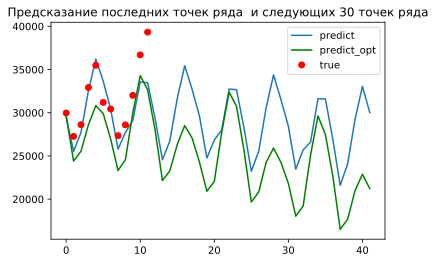

In [17]:
pred_dynamic = results.forecast(42)    #делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = results_opt.forecast(42)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(df_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

#### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Прогноз выглядит неплохо, но на недельном ресемплинге значения были ближе.

#### 4. Возьмите вариант 1 или 2

### Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [18]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [19]:
brent_data_w = brent_data.resample('W').mean()

In [20]:
q = 1                          # примем выборочные значения ACF, PACF для построения модели ARIMA
p = 2
d = 2
pdq = [p, d, q]

qs = 2
ps = 1
ds = 1
seasonal_pdq = [ps, ds, qs, 52]

In [21]:
mod = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-12], 
                                  order=pdq, 
                                  seasonal_order=seasonal_pdq,
                                  enforce_stationarity= False,
                                  enforce_invertibility=False)

In [22]:
res = mod.fit()

In [23]:
print(res.summary().tables[0],res.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 2655
Model:             SARIMAX(2, 2, 1)x(1, 1, 2, 52)   Log Likelihood               -4140.072
Date:                            Thu, 21 May 2020   AIC                           8294.144
Time:                                    16:31:25   BIC                           8334.899
Sample:                                         0   HQIC                          8308.941
                                           - 2655                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

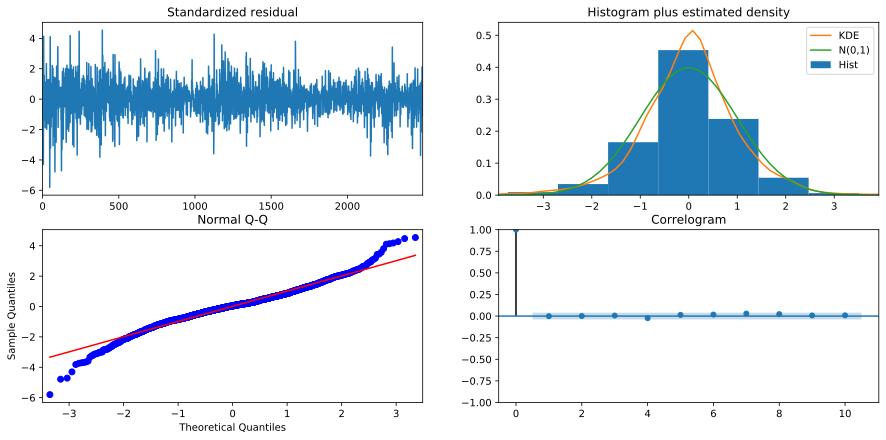

In [24]:
res.plot_diagnostics(figsize=(15, 7))
plt.show()

###### Вывод: случайно выбранные параметры q, p, d и  qs, ps, ds лучше заменить на подбор best значений по аглоритму, примененному по дата-сету "my_PJME_MW.csv".

### 5.Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA

" При прогнозировании по модели ARIMA от имеющейся выборки зависят как оценки коэффициентов модели, так и значения регрессоров, поэтому сложно аналитически выразить условную дисперсию ошибки прогноза через имеющиеся значения временного ряда. Общепринято ограничиваться не очень реалистичным предположением о том, что коэффициенты модели известны точно. Разумеется, это предположение уменьшает дисперсию ошибки прогноза, чем увеличивает кажущуюся точность как условного, так и безусловного прогнозов. " 
##### (из лекции 2 Канторовича Г.Г. "Анализ временных рядов")